### Submitted by Deepak Hazarika  , Parinita Bora , Gurudatta

In [1]:
!python --version

Python 3.6.9


In [1]:
!pip install PyDrive

## Import pydrive modules

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


## Upload the cifar 10 image files from google drive to colab

In [4]:
downloaded = drive.CreateFile({'id':"1fohphdiuj_-zG7EwFnRzj4NQ3rZRu_PY"})   # replace the id with id of file you want to access
downloaded.GetContentFile('cifar10.zip')

In [5]:
from zipfile import ZipFile

## Extract the images into a local folder

In [6]:
with ZipFile('/content/cifar10.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [8]:
#!pip install albumentations

#Image classification of Cifar 10 dataset using Resnet 18 CNN model

### Initialize the parameters

In [7]:
EPOCHS = 15
BATCH_SIZE = 32
TRAIN_DATASET_SIZE = 50000
BUCKET_SIZE = 5
NUMBER_OF_BATCHES =  TRAIN_DATASET_SIZE // BATCH_SIZE
NUMBER_OF_BUCKETS = NUMBER_OF_BATCHES // BUCKET_SIZE
DATAFOLDER = "/content/cifar10/"

## Import the model library from https://github.com/tfdeepnet/visionlib.git

In [8]:
!git clone https://github.com/tfdeepnet/visionlib.git

Cloning into 'visionlib'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 275 (delta 155), reused 193 (delta 73), pack-reused 0
Receiving objects: 100% (275/275), 92.84 KiB | 13.26 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [9]:
!pip install -e /content/visionlib 


Obtaining file:///content/visionlib
  Running setup.py develop for visionlib


In [10]:
import visionlib.models as vl
import visionlib.utils as utl
#import visionlib.albumentations as A


In [11]:
%matplotlib inline

## Import the libraries

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import cv2
import numpy as np

## Use the loaddata utility from visionlib library to load train and test data





In [17]:
trainloader, testloader = utl.loadalbumentationdata(DATAFOLDER , BATCH_SIZE )


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



img shape  torch.Size([32, 3, 32, 32])


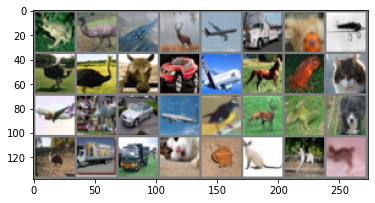

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print("img shape " , images.shape)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Instantiate a resnet18 model to train and test the cifar 10 dataset


In [14]:
net = vl.ResNet18()

### Get the model summary alongwith the recepive field at each layer

In [15]:
#!pip install torchsummary
#from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

utl.summary(net.to(device), input_size=(3, 32, 32))

cuda
-----------------------------------------------------------------------------------------------
        Layer (type) |              Output Shape |         Param # |          RF out |         Jump in
            Conv2d-1 |          [-1, 64, 32, 32] |           1,728 |               3 |               1
       BatchNorm2d-2 |          [-1, 64, 32, 32] |             128 |               0 |               0
            Conv2d-3 |          [-1, 64, 32, 32] |          36,864 |               5 |               1
       BatchNorm2d-4 |          [-1, 64, 32, 32] |             128 |               0 |               0
            Conv2d-5 |          [-1, 64, 32, 32] |          36,864 |               7 |               1
       BatchNorm2d-6 |          [-1, 64, 32, 32] |             128 |               0 |               0
        BasicBlock-7 |          [-1, 64, 32, 32] |               0 |               0 |               0
            Conv2d-8 |          [-1, 64, 32, 32] |          36,864 |       

(tensor(11173962), tensor(11173962))

## Define a Loss function, optimizer and scheduler 

Let's use a Classification Cross-Entropy loss , SGD with momentum and StepLR to vary the learning rate progressively.



In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

## Train the network for 15 epochs



In [21]:
print("count {}".format(2))

count 2


In [22]:
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    utl.train(epoch , trainloader, optimizer, net, criterion, NUMBER_OF_BUCKETS , device )
    scheduler.step()            

print('Finished Training')

[1,     1] loss: 0.008
[1,   313] loss: 1.928
[1,   625] loss: 1.662
[1,   937] loss: 1.519
[1,  1249] loss: 1.359
[1,  1561] loss: 1.240
[2,     1] loss: 0.004
[2,   313] loss: 1.163
[2,   625] loss: 1.061
[2,   937] loss: 1.027
[2,  1249] loss: 0.975
[2,  1561] loss: 0.942
[3,     1] loss: 0.003
[3,   313] loss: 0.843
[3,   625] loss: 0.856
[3,   937] loss: 0.828
[3,  1249] loss: 0.813
[3,  1561] loss: 0.784
[4,     1] loss: 0.003
[4,   313] loss: 0.726
[4,   625] loss: 0.714
[4,   937] loss: 0.701
[4,  1249] loss: 0.713
[4,  1561] loss: 0.699
[5,     1] loss: 0.002
[5,   313] loss: 0.628
[5,   625] loss: 0.634
[5,   937] loss: 0.626
[5,  1249] loss: 0.624
[5,  1561] loss: 0.614
[6,     1] loss: 0.002
[6,   313] loss: 0.561
[6,   625] loss: 0.564
[6,   937] loss: 0.553
[6,  1249] loss: 0.562
[6,  1561] loss: 0.560
[7,     1] loss: 0.002
[7,   313] loss: 0.444
[7,   625] loss: 0.399
[7,   937] loss: 0.393
[7,  1249] loss: 0.402
[7,  1561] loss: 0.385
[8,     1] loss: 0.001
[8,   313] 

### Let us display a batch of image from the test set to get familiar.



GroundTruth:  plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane plane


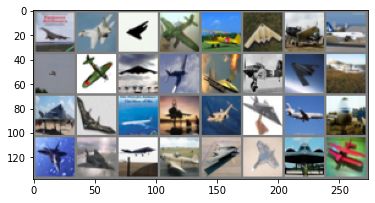

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

Okay, now let us see what the neural network thinks these examples above are:



In [24]:
outputs = net(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(BATCH_SIZE)))

Predicted:    cat   cat  bird plane plane horse truck plane  bird  bird  bird  deer  frog   cat  bird  ship truck   cat  ship horse  ship  frog plane truck  deer   cat plane  ship  bird   cat plane   car


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [26]:
#Example for saving a checkpoint assuming the network class named #Classifier

checkpoint = {'model': net,
          'state_dict': net.state_dict(),
          'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [27]:
utl.test(testloader, net, device )

Accuracy of the network on the 10000 test images: 25 %


## Test accuracy 25% (randomly picking a class out of 10 classes).
Seems like the network learnt something.




## Test accuracy at each class level

In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 21 %
Accuracy of   car : 45 %
Accuracy of  bird : 26 %
Accuracy of   cat : 20 %
Accuracy of  deer : 25 %
Accuracy of   dog : 21 %
Accuracy of  frog : 17 %
Accuracy of horse : 25 %
Accuracy of  ship : 32 %
Accuracy of truck : 31 %


In [29]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('checkpoint.pth')

## grad cam code used from https://github.com/jacobgil/pytorch-grad-cam/blob/master/gradcam.py 

Use a pretrained model to show heat map on test data

In [16]:
image_path =   '/content/cifar10/cifar10/test/dog/0015.png'
model = models.resnet50(pretrained=True)
grad_cam = utl.GradCam(model=model, feature_module=model.layer4, \
                       target_layer_names=["2"], use_cuda=use_cuda)

img = cv2.imread(image_path, 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
input = utl.preprocess_image(img)

# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask = grad_cam(input, target_index)

utl.show_cam_on_image(img, mask)